### Import libraries



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

### load data

In [7]:
csv_file_path = '/content/bank-full.csv'

df = pd.read_csv(csv_file_path, sep=';')

display(df.sample(5))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31320,50,housemaid,married,secondary,no,388,no,no,cellular,11,mar,203,2,-1,0,unknown,yes
26712,58,self-employed,married,tertiary,no,6237,yes,no,cellular,20,nov,88,2,-1,0,unknown,no
1119,39,technician,single,unknown,no,0,yes,no,unknown,7,may,130,1,-1,0,unknown,no
4502,37,management,single,tertiary,no,427,yes,no,unknown,20,may,121,1,-1,0,unknown,no
18120,59,management,married,tertiary,no,332,yes,yes,cellular,30,jul,35,2,-1,0,unknown,no


### Data exploration

In [8]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Data analysis

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.883015
yes,0.116985


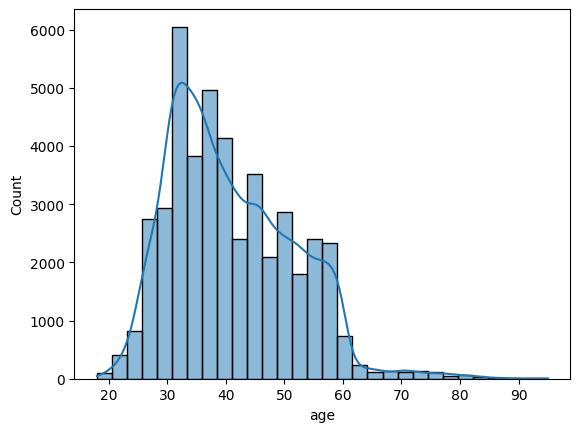

In [14]:
sns.histplot(df['age'], bins=30, kde=True)
plt.show()

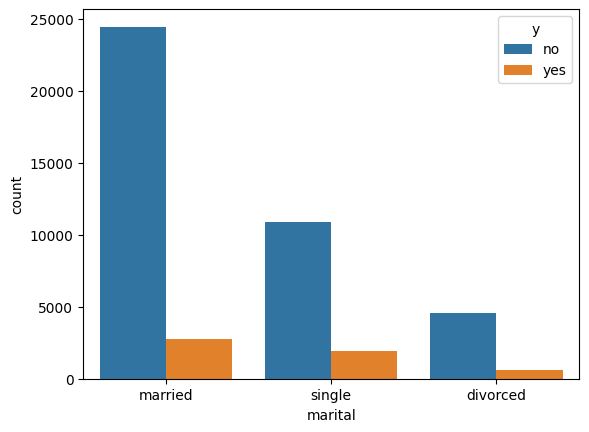

In [15]:
sns.countplot(x='marital', hue='y', data=df)
plt.show()

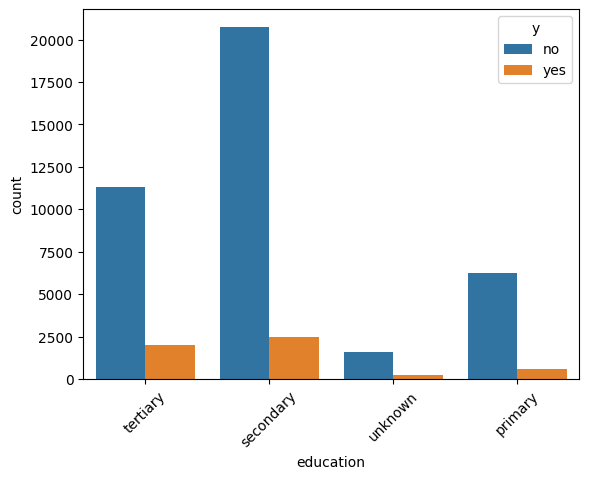

In [16]:
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

In [17]:
df.groupby('y')['balance'].mean()

,balance
y,
no,1303.714969
yes,1804.267915


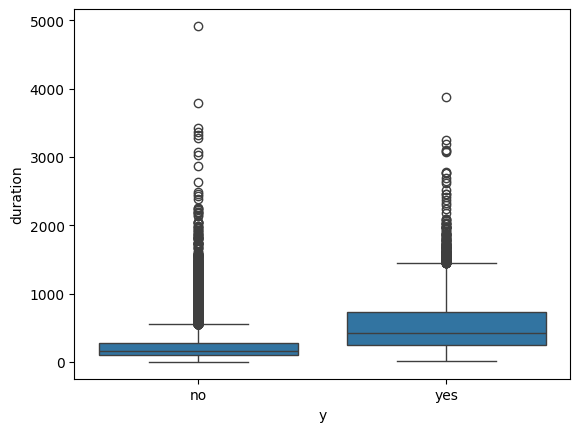

In [18]:
sns.boxplot(x='y', y='duration', data=df)
plt.show()

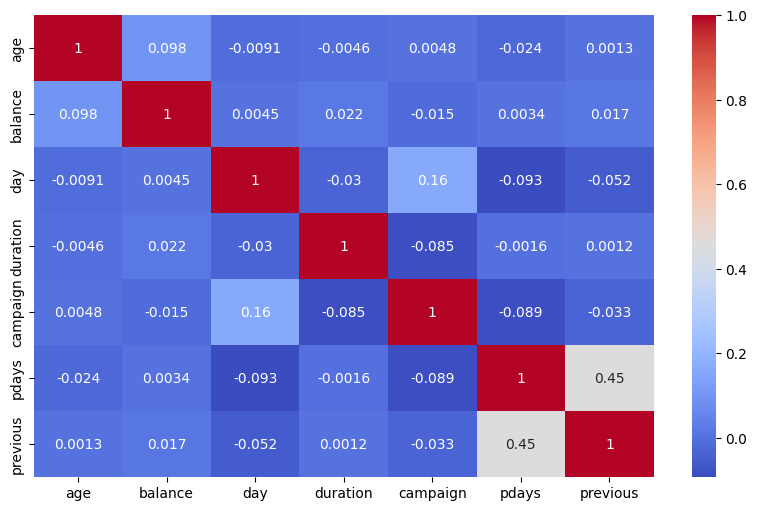

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### Preparing data for the model

Class counts:
y
no     39922
yes     5289
Name: count, dtype: int64

Class percentages:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


/tmp/ipython-input-20218763.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


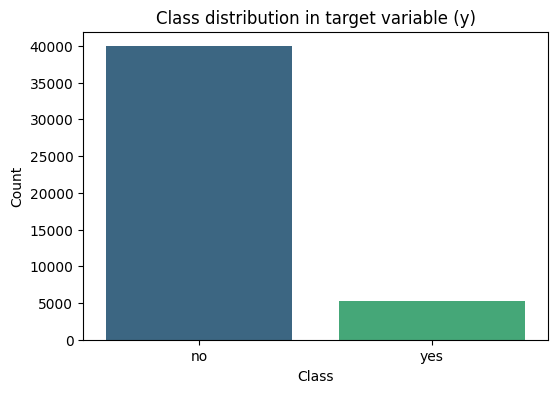

In [21]:
class_counts = df['y'].value_counts()
class_percentages = df['y'].value_counts(normalize=True) * 100

print("Class counts:")
print(class_counts)
print("\nClass percentages:")
print(class_percentages)

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class distribution in target variable (y)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Class counts after resampling:
y
no     39922
yes    39922
Name: count, dtype: int64


/tmp/ipython-input-2114381971.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts().values, palette="viridis")


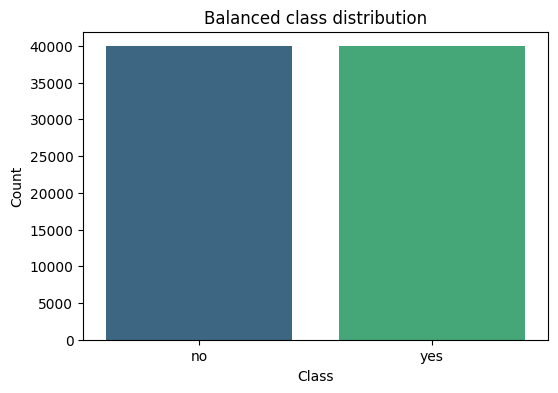

In [22]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('y', axis=1)
y = df['y']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Class counts after resampling:")
print(y_resampled.value_counts())

plt.figure(figsize=(6,4))
sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts().values, palette="viridis")
plt.title("Balanced class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'y':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

label_encoder = LabelEncoder()
df_encoded['y'] = label_encoder.fit_transform(df_encoded['y'])

df_encoded.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Top features:
duration     0.291135
balance      0.123046
month        0.100416
age          0.100390
day          0.086643
poutcome     0.057207
pdays        0.056166
job          0.040314
campaign     0.038058
education    0.025214
housing      0.022541
marital      0.018147
contact      0.017159
previous     0.012142
loan         0.009344
default      0.002079
dtype: float64


/tmp/ipython-input-230162783.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


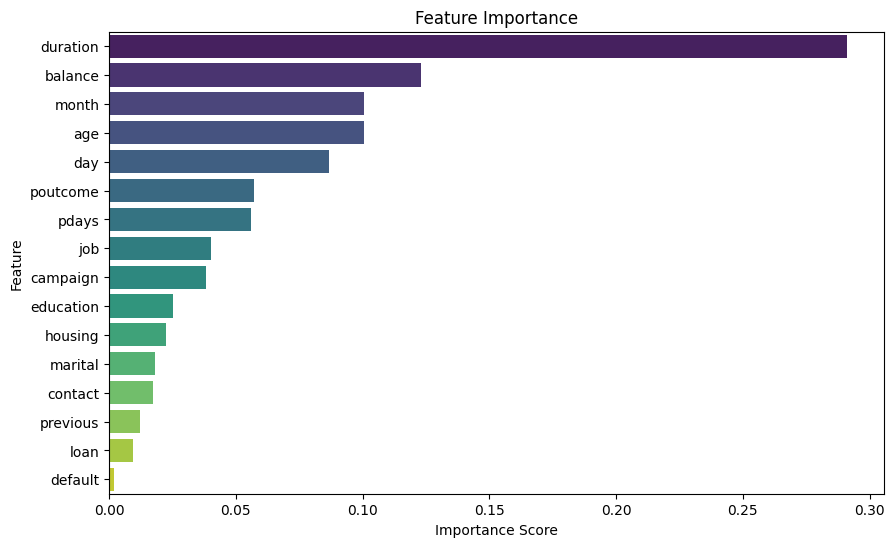

In [24]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Top features:")
print(importances)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### Model building

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'y':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

label_encoder = LabelEncoder()
df_encoded['y'] = label_encoder.fit_transform(df_encoded['y'])

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

selected_features = importances.head(8).index
X_resampled_selected = X_resampled[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

model = DecisionTreeClassifier(random_state=42, max_depth=6)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8098816456885215

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      7985
           1       0.84      0.77      0.80      7984

    accuracy                           0.81     15969
   macro avg       0.81      0.81      0.81     15969
weighted avg       0.81      0.81      0.81     15969


Confusion Matrix:
 [[6809 1176]
 [1860 6124]]


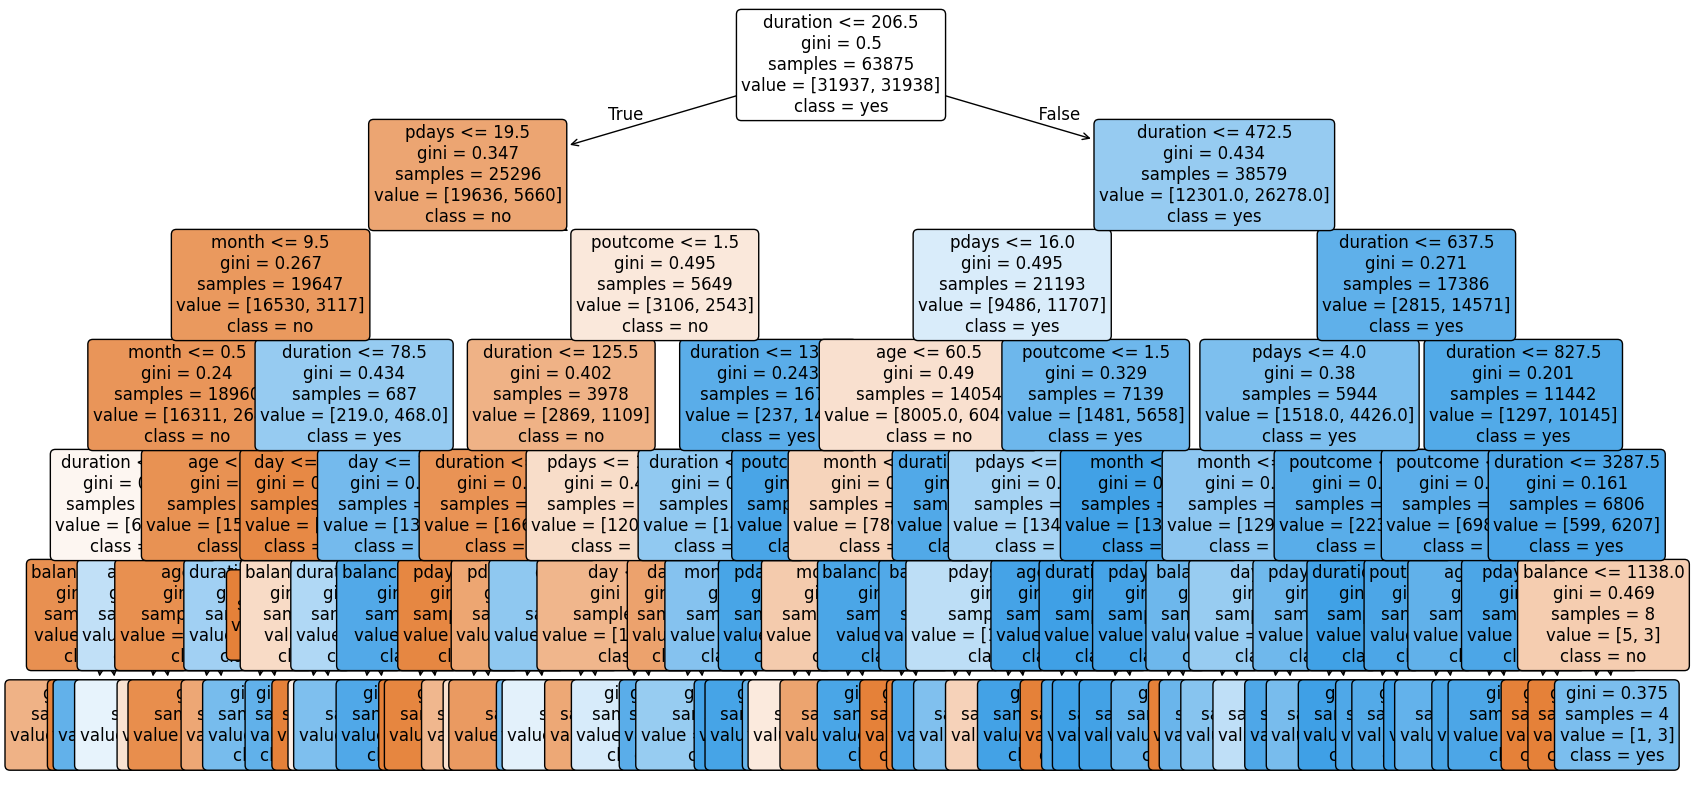

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()


### Executive Summary

This notebook analyzes a bank marketing dataset to predict whether a customer will subscribe to a term deposit.

**Data Loading and Exploration:**
- The dataset `bank-full.csv` was loaded and inspected for missing values and duplicates (none were found).
- The dataset contains 17 columns, including demographic information, banking details, and campaign-related attributes, with the target variable 'y' indicating whether the customer subscribed ('yes' or 'no').
- The target variable 'y' shows an imbalanced distribution, with a significantly higher number of customers who did not subscribe.
- Initial visualizations explored the distribution of age, the relationship between marital status and subscription, and education level and subscription.
- Analysis of numerical features showed differences in mean balance between subscribers and non-subscribers and highlighted potential outliers in features like 'duration'.
- A correlation heatmap of numerical features was generated.

**Data Preparation and Model Building:**
- Categorical features were encoded using Label Encoding.
- To address the class imbalance in the target variable, Random Over-Sampling was applied.
- Feature importance was analyzed using a Decision Tree Classifier, identifying 'duration', 'balance', and 'month' as the most important features.
- A Decision Tree Classifier model was built using the top 8 features, with a maximum depth of 6.

**Model Evaluation:**
- The model achieved an accuracy of approximately 81% on the test set.
- The classification report and confusion matrix provide further details on the model's performance, showing good recall and precision for both classes after resampling.

**Next Steps:**
- Further model tuning and evaluation could be performed to improve performance.
- Other classification algorithms could be explored.
- Analysis of the most important features could provide deeper business insights.